### Tamara Sashikirana - 22/492515/SV/20528

[link google collab](https://colab.research.google.com/drive/19ATTKYtFpB2bG4tpew9oHUPFcVjucqWH?usp=sharing)

https://colab.research.google.com/drive/19ATTKYtFpB2bG4tpew9oHUPFcVjucqWH?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv")

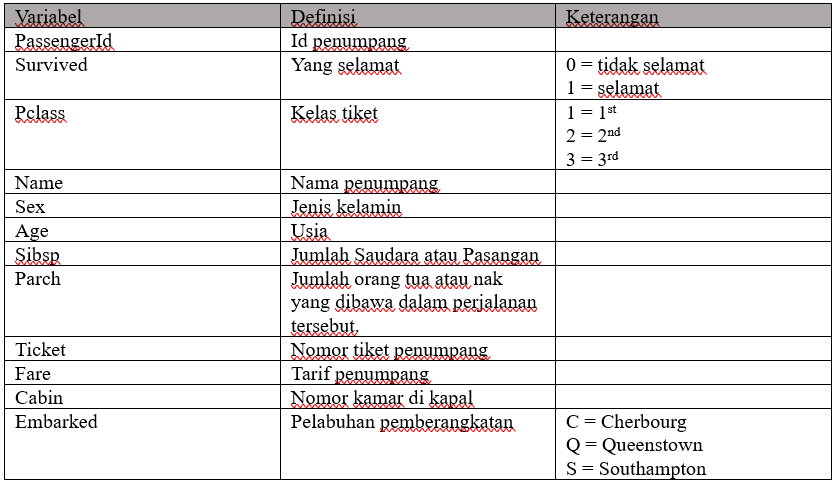

### Jenis data

*   PassengerId = kuantitatif diskrit
*   Survived = boolean
*   Pclass = kuantitatif disrit
*   Name = kualitatif nominal
*   Sex = kualitatif nominal
*   Age = kuantitatif kontinu
*   SibSp = kuantitatif diskrit
*   Parch = kuantitatif diskrit
*   Ticket = kualitatif nominal
*   Fare = kuantitatif kontinu
*   Cabin = kualitatif nominal
*   Embarked = kualitatif nominal














In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Up the Data

In [ ]:
print("Missings in the test data:")
display(titanic.isnull().sum())

Missings in the test data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# percentage of missing value
missing_values=titanic.isnull().sum()
missing_values[missing_values>0]/len(titanic)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [ ]:
# filling of missing values
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mode()[0])
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic['Cabin']=titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EKSPLORASI DATA ANALYSIS (EDA)
statistik deskriptif

In [ ]:
print('Shape dataset:', titanic.shape)
print('\n Informasi dataset:')
print(titanic.info())
print('\n Statistik deskriptif:\n', titanic.describe())

Shape dataset: (891, 12)

 Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Statistik deskriptif:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.3838

central tendencies and spread tendencies

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




1. count: total count of non-null values in the column
2. mean: the average of all the values in that column
3. min: the minimum value in the column
4. max: the maximum value in the column
5. 25%: first quartile in the column after we arrange those values in ascending order
6. 50%: this is the median or the second quartile
7. 75%: the third quartile
8. std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)




pemusatan data = mean, mode, median

penyebaran data = car, std, min, max

# Kolerasi Tiap Variabel


In [ ]:
print(titanic.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036186 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.052872 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.356187  0.083081  0.018443   
Age             0.036186 -0.052872 -0.356187  1.000000 -0.232411 -0.155118   
SibSp          -0.057527 -0.035322  0.083081 -0.232411  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.155118  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.107554  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.107554  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


seperti yang terlihat pada output di atas, tidak ada feature yang memiliki korelasi kuat (-0,8 sd -1 atau 0,8 sd 1), dengan korelasi tertinggi yaitu pclass dan Fare (-0,549500). Sehingga, tidak ada variabel yang dihilangkan dari model.

<Axes: >

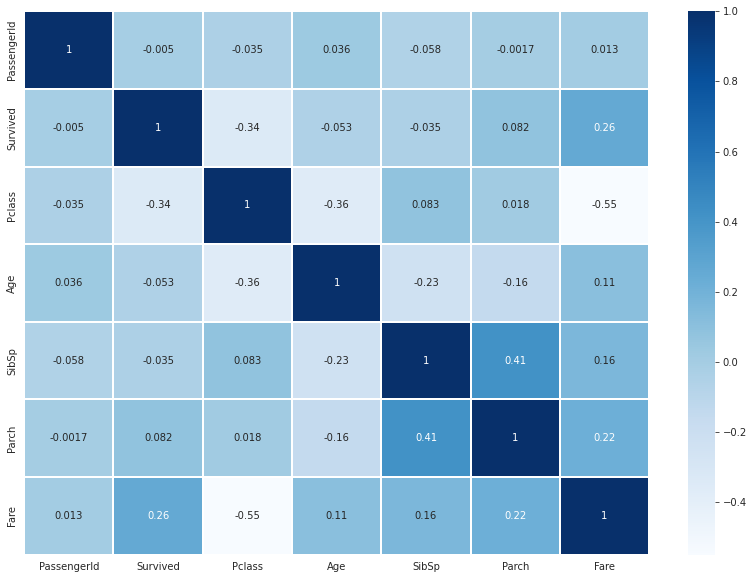

In [ ]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)

# Outliers Identification

In [ ]:
# percentile dari numpy
Q1 = np.percentile(titanic['Age'],25) #kuartil pertama atau persentil ke 25
Q3 = np.percentile(titanic['Age'],75) #kuartil ketiga atau persentil ke 75

## mencari interkuartil
IQR = Q3 - Q1

print('Quartile 1 = ', Q1)
print('Quartile 3 = ', Q3)
print('IQR : ', IQR)

Quartile 1 =  22.0
Quartile 3 =  35.0
IQR :  13.0


In [ ]:
IQR_min = Q1 - (1.5 * IQR)

IQR_max = Q3 + (1.5 * IQR)

print('IQR minimum : ', IQR_min)
print('IQR maksimum: ', IQR_max)

IQR minimum :  2.5
IQR maksimum:  54.5


In [ ]:
data_min = np.min(titanic['Age'])
data_max = np.max(titanic['Age'])

print('Nilai minimum : ', data_min)
print('Nilai maksimum : ', data_max)

Nilai minimum :  0.42
Nilai maksimum :  80.0


In [ ]:
outlier_low = []
outlier_high = []


for x in titanic['Age']:
    if (x < IQR_min):
        outlier_low.append(x)
    if (x > IQR_max):
        outlier_high.append(x)

print('Outlier Low: ', outlier_low)
print('Outlier High: ', outlier_high)

Outlier Low:  [2.0, 2.0, 0.83, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.92, 2.0, 1.0, 1.0, 0.75, 2.0, 2.0, 2.0, 0.75, 0.67, 1.0, 0.42, 2.0, 1.0, 0.83]
Outlier High:  [58.0, 55.0, 66.0, 65.0, 59.0, 71.0, 70.5, 55.5, 61.0, 56.0, 58.0, 59.0, 62.0, 58.0, 63.0, 65.0, 61.0, 60.0, 64.0, 65.0, 56.0, 63.0, 58.0, 55.0, 71.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 57.0, 62.0, 74.0, 56.0]


# VARIANCE

In [ ]:
np.var(titanic)

PassengerId    66156.666667
Survived           0.236506
Pclass             0.698231
Age              174.033152
SibSp              1.214678
Parch              0.648999
Fare            2466.665312
dtype: float64

np.var() adalah fungsi dari library NumPy yang digunakan untuk menghitung variance atau varians dari suatu data. Varians adalah suatu ukuran sebaran data yang mengukur seberapa jauh nilai-nilai data tersebar dari rata-rata.

Jika titanic adalah sebuah array atau dataframe yang berisi data tentang penumpang kapal Titanic, maka np.var(titanic) akan menghitung varians dari seluruh data dalam array atau dataframe tersebut. Namun, nilai varians yang dihasilkan akan sangat bergantung pada jenis data dan variabel apa saja yang terdapat di dalam titanic.



# MODUS

In [ ]:
print('Modus Survived: ', stats.mode(titanic['Survived']))
print('Modus Pclass: ', stats.mode(titanic['Pclass']))
print('Modus Sex: ', stats.mode(titanic['Sex']))
print('Modus Age: ', stats.mode(titanic['Age']))
print('Modus SibSp: ', stats.mode(titanic['SibSp']))
print('Modus Parch: ', stats.mode(titanic['Parch']))
print('Modus Cabin: ', stats.mode(titanic['Cabin']))
print('Modus Embarked: ', stats.mode(titanic['Embarked']))

Modus Survived:  ModeResult(mode=array([0]), count=array([549]))
Modus Pclass:  ModeResult(mode=array([3]), count=array([491]))
Modus Sex:  ModeResult(mode=array(['male'], dtype=object), count=array([577]))
Modus Age:  ModeResult(mode=array([24.]), count=array([207]))
Modus SibSp:  ModeResult(mode=array([0]), count=array([608]))
Modus Parch:  ModeResult(mode=array([0]), count=array([678]))
Modus Cabin:  ModeResult(mode=array(['B96 B98'], dtype=object), count=array([691]))
Modus Embarked:  ModeResult(mode=array(['S'], dtype=object), count=array([646]))



1.   kebanyakan penumpang Kapal Titanic dinyatakan tidak selamat, berdasarkan modus dari dataframe 'Survived' yang bernilai 0 muncul sebanyak 549 kali.
2.   Kebanyakan dari penumpang Kapal Titanic berada di kelas tiket ketiga, berdasarkan modus dataframe 'Pclass' yang bernilai 3 muncul sebanyak 491 kali.
3.   Kebanyakan penumpang Kapal Titanic berjenis kelamin pria, berdasarkan modus dataframe 'Sex' yang bernilai male muncul sebanyak 577 kali.
4.   Kebanyakan penumpang kapal Titanic berada di usia sekitar 24 tahun, berdasarkan modus dataframe 'Age' yang bernilai 24. muncul sebanyak 207 kali.
5.   Kebanyakan penumpang kapal Titanic tidak membawa Saudara/Pasangan, berdasarkan modus dataframe 'SibSp' yang bernilai 0 muncul sebanyak 608 kali.
6.   Kebanyakan penumpang kapal Titanic tidak membawa Orang Tua/Anak, berdasarkan modus dataframe 'Parch' yang bernilai 0 muncul sebanyak 678 kali.
7.   Kebanyakan penumpang kapal Titanic memiliki nomor kabin B96 B98, berdasarkan modus dataframe 'Cabin' yang bernilai B96 B98 muncul sebanyak 691 kali.
8.   Kebanyakan penumpang kapal Titanic berangkat dari Pelabuhan Southampton, berdasarkan modus dataframe 'Embarked' yang bernilai S muncul sebanyak 646 kali.

# Visualisasi Data
mengetahui hubungan tiap variabel, mengetahui adanya data yang tidak balance, dan mendeteksi outlier untuk data numerik.

histogram

Text(0.5, 1.0, 'Distribusi Usia')

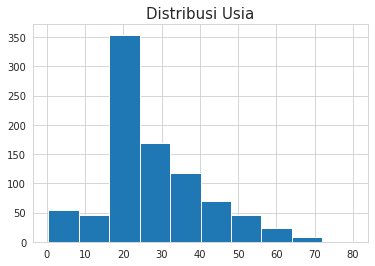

In [ ]:
titanic['Age'].hist(bins=10)
plt.title('Distribusi Usia', fontsize = 15)

Text(0.5, 1.0, 'Distribusi Tarif Penumpang')

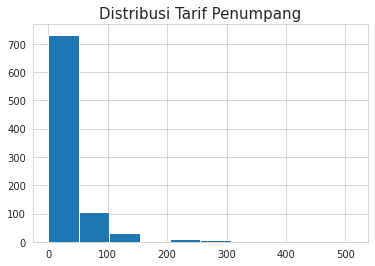

In [ ]:
titanic['Fare'].hist(bins=10)
plt.title('Distribusi Tarif Penumpang', fontsize = 15)

# Dotplot

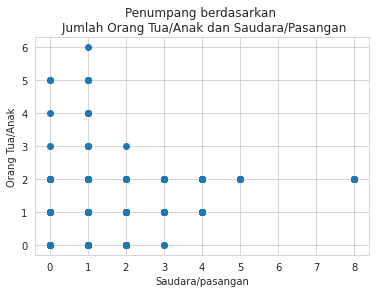

In [ ]:
fig, ax = plt.subplots()
ax.plot(titanic['SibSp'], (titanic['Parch']), 'o')
# Set axis labels
plt.xlabel('Saudara/pasangan')
plt.ylabel('Orang Tua/Anak')

# Set title
plt.title('Penumpang berdasarkan \n Jumlah Orang Tua/Anak dan Saudara/Pasangan')
# Menampilkan plot
plt.show()


skewed right = a few unusually

### Contoh Penggunaan Outlier Pada Boxplot

Text(0.5, 1.0, 'Usia Penumpang \n berdasarkan Kelas Tiket\n')

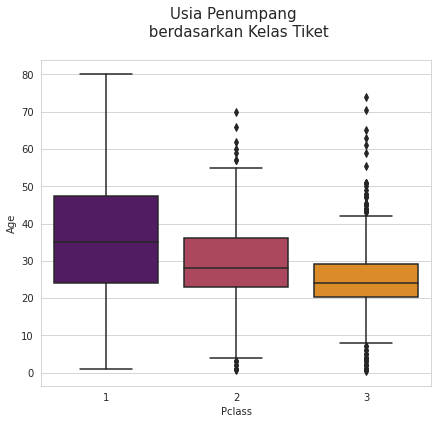

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=titanic.Pclass, y=titanic.Age, palette='inferno')
plt.title('Usia Penumpang \n berdasarkan Kelas Tiket\n', fontsize=15)

Data miring (tidak simetris) ditunjukkan oleh boxplot dengan letak garis median tidak berada di tengah kotak. Data miring juga ditandai dari panjang whisker tidak sama antara atas-bawah atau kanan-kiri. Whisker atas lebih panjang dan terdapat outlier di bagian atas menandakan data cenderung miring ke kanan (positive skewness). Whisker bawah lebih panjang dan terdapat outlier di bagian bawah menandakan data cenderung miring ke kiri (negative skewness).

boxplot tersebut merupakan boxplot vertikal

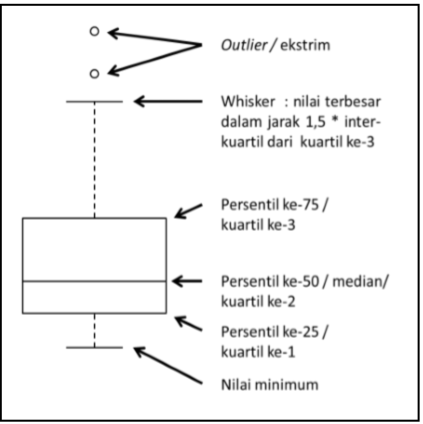

### 1. Perbandingan Jumlah yang Selamat dan Tidak Selamat

Text(0.5, 1.0, 'Grouped by Survival')

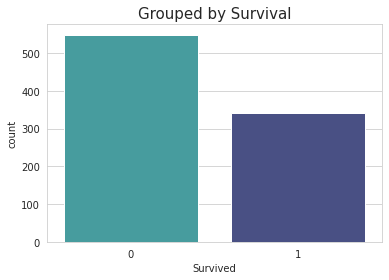

In [ ]:
# barchart
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = titanic, palette ='mako_r')
plt.title('Grouped by Survival', fontsize = 15)

In [ ]:
countNotSurvive = len(titanic[titanic.Survived == 0])
countSurvive = len(titanic[titanic.Survived == 1])
print("Not Survive Percentage: {:.2f}%".format((countNotSurvive / (len(titanic.Survived))*100)))
print("Survive Percentage: {:.2f}%".format((countSurvive / (len(titanic.Survived))*100)))

Not Survive Percentage: 61.62%
Survive Percentage: 38.38%


<Axes: ylabel='Survived'>

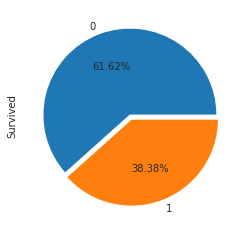

In [ ]:
# menggunakan pie chart
explode = [0, 0.05]
titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

dari grafik tersebut, hanya 38.38% dari keseluruhan penumpang yang dinyatakan selamat dari tragedi tenggelamnya kapal Titanic

### 2. Jumlah yang Selamat Berdasarkan Jenis Kelamin

Text(0.5, 1.0, 'Survived by Sex')

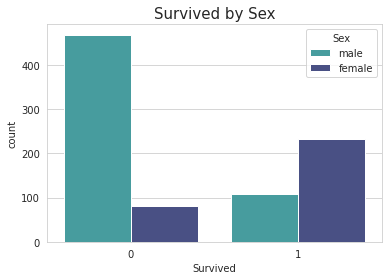

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic, palette = 'mako_r')
plt.title("Survived by Sex", fontsize = 15)

berdasarkan grafik yang ada, penumpang wanita lebih mungkin untuk bertahan hidup daripada penumpang pria. Penumpang laki-laki, di sisi lain, lebih kecil kemungkinannya untuk bertahan hidup. Masuk akal untuk berasumsi bahwa perempuan didahulukan dalam operasi penyelamatan dan bahwa laki-laki mengorbankan hidup mereka untuk menyelamatkan perempuan.

### 3. Jumlah yang Selamat Berdasarkan Kelas Tiket

Text(0.5, 1.0, 'Survived by Pclass')

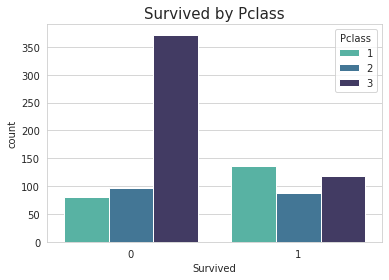

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic, palette = 'mako_r')
plt.title("Survived by Pclass", fontsize = 15)

Dari grafik tersebut dapat disimpulkan bahwa mayoritas penumpang yang selamat dari tragedi tenggelamnya kapal Titanic memiliki kelas tiket 1 dan mayoritas penumpang yang tidak selamat memiliki kelas tiket 3. Penumpang kelas tiga memiliki tingkat kelangsungan hidup terendah. Selain itu, sebagian besar penumpang kelas satu melarikan diri. Sebagian besar penumpang di kelas lain tewas. Sebagian besar dari mereka yang meninggal adalah penumpang kelas tiga.

### 4. Bertahan Hidup Berdasarkan jumlah saudara atau pasangan

Text(0.5, 1.0, 'Survived by SibSp')

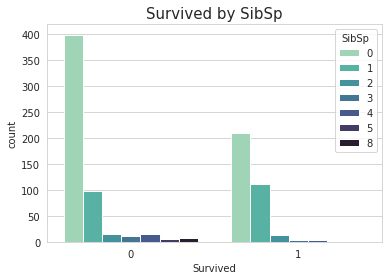

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'SibSp', data = titanic, palette = 'mako_r')
plt.title("Survived by SibSp", fontsize = 15)

Berdasarkan hasil penelitian, penumpang tanpa saudara/pasangan atau dengan jumlah saudara/pasangan yang sedikit memiliki tingkat kelangsungan hidup yang lebih besar dibandingkan penumpang dengan jumlah saudara/pasangan yang banyak.

### 5. Bertahan Hidup Berdasarkan Jumlah Orang Tua atau Anak yang Dibawa

Text(0.5, 1.0, 'Survived by Parch')

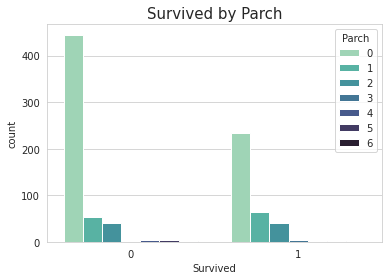

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Parch', data = titanic, palette = 'mako_r')
plt.title("Survived by Parch", fontsize = 15)

Penumpang tanpa orang tua/anak atau memiliki jumlah orang tua/anak terbatas memiliki tingkat kelangsungan hidup yang lebih tinggi daripada penumpang yang memiliki banyak orang tua/anak, yang sebanding dengan temuan SibSp.

### 6. Persebaran Tarif Penumpang

Text(0.5, 1.0, '\n Keselamatan Penumpang \n berdasarkan Tarif\n')

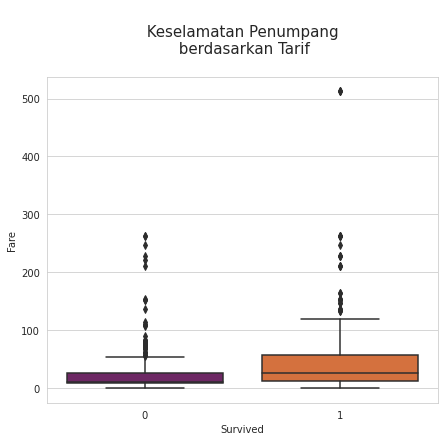

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=titanic.Survived, y=titanic.Fare, palette='inferno')
plt.title('\n Keselamatan Penumpang \n berdasarkan Tarif\n', fontsize=15)

Hasilnya mengungkapkan bahwa penumpang yang selamat membayar tarif lebih tinggi daripada mereka yang tidak. Berdasarkan box plot, median fare penumpang yang tidak selamat lebih rendah dari median fare penumpang yang selamat. Sebagian besar penumpang yang membayar ongkos sekitar $8 tidak selamat.

### 7. Bertahan Hidup Berdasarkan Pelabuhan Pemberangkatan

Text(0.5, 1.0, 'Survived by Embarked')

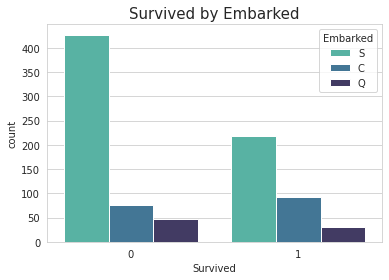

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Embarked', data = titanic, palette = 'mako_r')
plt.title("Survived by Embarked", fontsize = 15)

Penumpang yang berangkat dari Southampton terbukti paling mungkin bertahan, diikuti oleh penumpang yang naik di Cherbourg. Penumpang yang tiba di Queenstown memiliki tingkat kelangsungan hidup terendah. Dalam kasus ini, pelabuhan embarkasi dan kelas penumpang mungkin terkait dalam beberapa hal.

### 8. Sebaran Data Kelas Tiket Berdasarkan Usia dan Tarif.
menggunakan scatterplot

Text(0.5, 1.0, 'Sebaran Data Kelas Tiket\nBerdasarkan Usia dan Tarif\n')

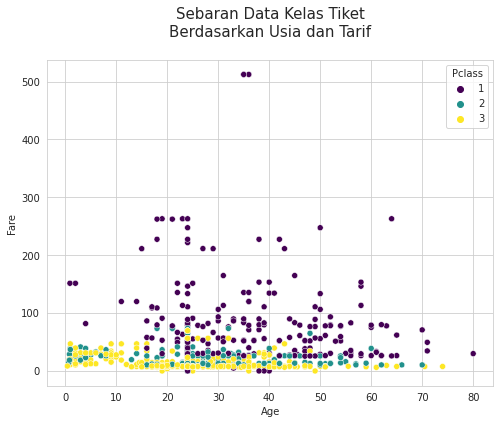

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(x=titanic.Age, y=titanic.Fare, hue=titanic.Pclass, palette='viridis')
plt.title('Sebaran Data Kelas Tiket\nBerdasarkan Usia dan Tarif\n', fontsize=15)

# Kesimpulan Akhir

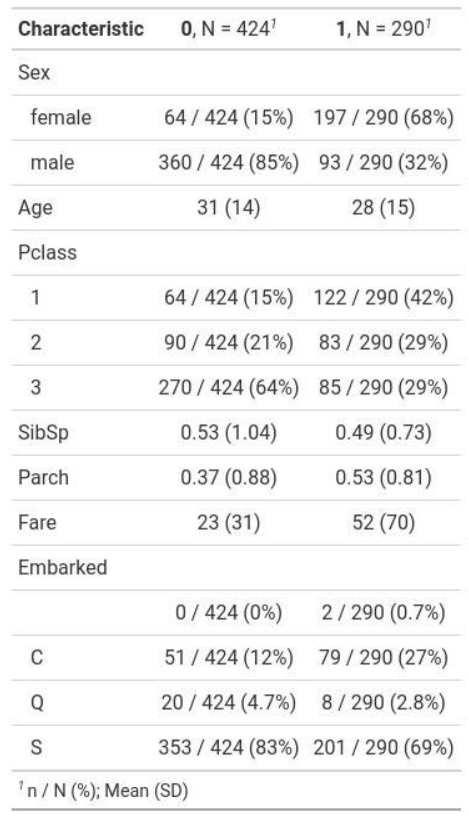

Statistik mengungkapkan bahwa jumlah penumpang yang tidak selamat lebih besar daripada jumlah penumpang yang selamat. Ada 424 orang tidak selamat dan 290 selamat. Menurut tabel di atas, penumpang wanita memiliki tingkat kelangsungan hidup 68 persen lebih besar daripada penumpang pria. Diperkirakan angka kematian laki-laki enam kali lebih tinggi daripada perempuan.

Penumpang yang selamat dan yang tidak memiliki kesamaan rata-rata usia dan standar deviasi. Akibatnya, usia rata-rata dan standar deviasi dari mereka yang selamat dan mereka yang tidak adalah 28 (15) dan 31 (14), masing-masing.

Tingkat kelangsungan hidup yang lebih besar tercatat untuk penumpang kelas satu, diikuti oleh mereka yang bepergian dengan kelas dua. Menurut penelitian, tingkat kelangsungan hidup terendah ditemukan pada penumpang kelas tiga. Tingkat kematian penumpang kelas satu, kelas dua, dan kelas tiga berturut-turut adalah 15%, 21%, dan 64%.

Berdasarkan data, terdapat perbedaan antara rata-rata saudara kandung/pasangan dan standar deviasi penumpang yang tidak selamat dan selamat (0,53 (1,04), dan 0,49 (0,73). Ada juga perbedaan rata-rata orang tua/anak yang selamat dan tidak, yaitu masing-masing 0,53 dan 0,37. Standar deviasi orang tua/anak penumpang yang tidak selamat lebih tinggi dari standar deviasi orang tua/anak penumpang yang selamat, masing-masing sebesar 0,88 dan 0,81.

Di antara penumpang yang tidak selamat dan yang selamat, rata-rata dan standar deviasi dari tarif penumpang masing-masing adalah 23 (31) dan 52 (70). Rata-rata dan standar deviasi dari tarif penumpang yang selamat kira-kira dua kali lebih tinggi daripada penumpang yang tidak selamat.